In [1]:
from elasticsearch import Elasticsearch
from plot import plot_data, merge_bom_epa, create_heatmap, plot_air_quality_and_sentiment, bom_health
import ipywidgets as widgets
from IPython.display import display, clear_output
from get_data import twitter, epa, bom, health
import pandas as pd

In [2]:
es = Elasticsearch(
    'https://127.0.0.1:9200',
    verify_certs=False,
    basic_auth=('elastic', 'elastic'),
    request_timeout=60,
    ssl_show_warn=False
    )

In [ ]:
city = None
disease = None

city_textbox = widgets.Text(
    value='',
    description='City:',
    disabled=False
)

disease_textbox = widgets.Text(
    value='COPD',
    description='Disease:',
    disabled=False
)

button = widgets.Button(description="Update Plot")

def on_button_clicked(b):
    global city, disease
    city = city_textbox.value
    disease = disease_textbox.value
    clear_output(wait=True)
    display(city_textbox, disease_textbox, button)
    plot_data(es, start=1, end=10, city=city, disease=disease, size=2000)

button.on_click(on_button_clicked)

display(city_textbox, disease_textbox, button)

In [ ]:
city = None
disease = None

city_textbox = widgets.Text(
    value='Melbourne',
    description='City:',
    disabled=False
)


button = widgets.Button(description="Update Plot")

def on_button_clicked(b):
    global city  
    city = city_textbox.value  
    clear_output(wait=True)  
    display(city_textbox, button)  
    plot_data(es, start=1, end=10, city=city, disease=disease, size=2000)  

button.on_click(on_button_clicked)

display(city_textbox, button)

In [26]:
epa_data = epa(es, start=3, end=10, size=2000)
bom_data = bom(es, start=3, end=10, size=2000)

In [27]:
print(epa_data)
print(bom_data)

[{'_index': 'epa-air-quality-2024-05-03', '_id': 'Box Hill-01:00:00', '_score': 1.0, '_source': {'hour': '01:00:00', 'siteName': 'Box Hill', 'coordinates': [-37.8287277, 145.1324], 'averageValue': 9.18, 'healthParameter': 'PM2.5', 'healthAdvice': 'Good'}}, {'_index': 'epa-air-quality-2024-05-03', '_id': 'Alphington-01:00:00', '_score': 1.0, '_source': {'hour': '01:00:00', 'siteName': 'Alphington', 'coordinates': [-37.7784081, 145.0306], 'averageValue': 9.79, 'healthParameter': 'PM2.5', 'healthAdvice': 'Good'}}, {'_index': 'epa-air-quality-2024-05-03', '_id': 'Churchill-01:00:00', '_score': 1.0, '_source': {'hour': '01:00:00', 'siteName': 'Churchill', 'coordinates': [-38.3043137, 146.414932], 'averageValue': 2.5, 'healthParameter': 'PM2.5', 'healthAdvice': 'Good'}}, {'_index': 'epa-air-quality-2024-05-03', '_id': 'Traralgon South-01:00:00', '_score': 1.0, '_source': {'hour': '01:00:00', 'siteName': 'Traralgon South', 'coordinates': [-38.29585, 146.5392], 'averageValue': 5.47, 'healthPar

In [ ]:
data_epa = [{**item['_source'], 'date': item['_index']} for item in epa_data]
# data_epa = [item['_source'] for item in epa_data]
epa_df = pd.DataFrame(data_epa)
print(epa_df)

In [29]:
data_bom = [item['_source'] for item in bom_data]
bom_df = pd.DataFrame(data_bom)
print(data_bom)
# print(bom_df)

[{'site_name': 'Melbourne (Olympic Park)', 'local_date_time': '20240503153000', 'coordinates': [-37.8, 145.0], 'apparent_temperature': 15.8, 'cloud': '-', 'cloud_type': '-', 'delta_temperature': 3.0, 'air_temperature': 16.6, 'dew_point': 10.9, 'press': 1027.2, 'press_tend': '-', 'rain_trace': '0.0', 'swell_period': None, 'vis_km': '10', 'weather': 'Fine', 'wind_spd_kmh': 6}, {'site_name': 'Melbourne Airport', 'local_date_time': '20240503153000', 'coordinates': [-37.7, 144.8], 'apparent_temperature': 14.0, 'cloud': 'Clear', 'cloud_type': '-', 'delta_temperature': 4.4, 'air_temperature': 16.9, 'dew_point': 8.3, 'press': 1027.2, 'press_tend': '-', 'rain_trace': '0.2', 'swell_period': None, 'vis_km': '10', 'weather': 'Fine', 'wind_spd_kmh': 13}, {'site_name': 'Melbourne (Olympic Park)', 'local_date_time': '20240503160000', 'coordinates': [-37.8, 145.0], 'apparent_temperature': 15.6, 'cloud': '-', 'cloud_type': '-', 'delta_temperature': 2.9, 'air_temperature': 16.6, 'dew_point': 11.1, 'pres

In [ ]:
merged_df = merge_bom_epa(bom_df=bom_df, epa_df=epa_df)
print(merged_df)

In [ ]:
weather_columns = ['apparent_temperature', 'delta_temperature', 'air_temperature', 'dew_point', 'wind_spd_kmh']
air_quality_columns = ['averageValue']

create_heatmap(merged_df, weather_columns, air_quality_columns)

In [ ]:
city = "Ballarat"

In [30]:
twitter_data = twitter(es, city=city, size=2000)
epa_data = epa(es, start=3, end=14, city=city, size=2000)

In [31]:
print(twitter_data)

[{'_index': 'twitter_vic', '_id': 'D7B88089-7378-43BC-9AA2-A08C47F4730A', '_score': 1.0, '_source': {'sentiment': 0.1, 'full_name': 'Melbourne', 'language': 'en'}}, {'_index': 'twitter_vic', '_id': '81DA4E5A-6D0E-4F24-B0BD-C47B390625E7', '_score': 1.0, '_source': {'sentiment': -0.15384615384615385, 'full_name': 'Melbourne', 'language': 'en'}}, {'_index': 'twitter_vic', '_id': 'F744A29D-92DA-4D2E-A61D-BA761B901710', '_score': 1.0, '_source': {'sentiment': 0, 'full_name': 'Melbourne', 'language': 'so'}}, {'_index': 'twitter_vic', '_id': 'F2928EFB-C628-41E9-94DA-F20BE95E2D1A', '_score': 1.0, '_source': {'sentiment': 1, 'full_name': 'Melbourne', 'language': 'tl'}}, {'_index': 'twitter_vic', '_id': '515E91E0-47CA-4CD9-825A-EE952A497DD5', '_score': 1.0, '_source': {'sentiment': 0.5, 'full_name': 'Melbourne', 'language': 'en'}}, {'_index': 'twitter_vic', '_id': 'CA476112-A300-4BC5-A130-EB5F198CCD31', '_score': 1.0, '_source': {'sentiment': 0.46153846153846156, 'full_name': 'Melbourne', 'langu

In [34]:
data_twitter = [item['_source'] for item in twitter_data]
twitter_df = pd.DataFrame(data_twitter)

In [35]:
print(data_twitter)

[{'sentiment': 0.1, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': -0.15384615384615385, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': 0, 'full_name': 'Melbourne', 'language': 'so'}, {'sentiment': 1, 'full_name': 'Melbourne', 'language': 'tl'}, {'sentiment': 0.5, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': 0.46153846153846156, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': 0.5294117647058824, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': 0.08, 'full_name': 'Melbourne', 'language': 'da'}, {'sentiment': 0, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': 0, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': -0.08333333333333333, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': 0.022222222222222223, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': -0.05714285714285714, 'full_name': 'Melbourne', 'language': 'en'}, {'sentiment': 0.11764705882352941, 'full_name': 'Melbourne', 'language': 'e

In [ ]:
data_twitter = [item['_source'] for item in twitter_data]
twitter_df = pd.DataFrame(data_twitter)

data_epa = [{**item['_source'], 'date': item['_index']} for item in epa_data]
epa_df = pd.DataFrame(data_epa)

In [ ]:
print(epa_df)

In [ ]:
plot_air_quality_and_sentiment(epa_df, twitter_df, city)

In [ ]:
bom_health(es, start, end, size=2000, city=None, disease=None)

Text(value='', description='City:')

Text(value='COPD', description='Disease:')

Button(description='Update Plot', style=ButtonStyle())

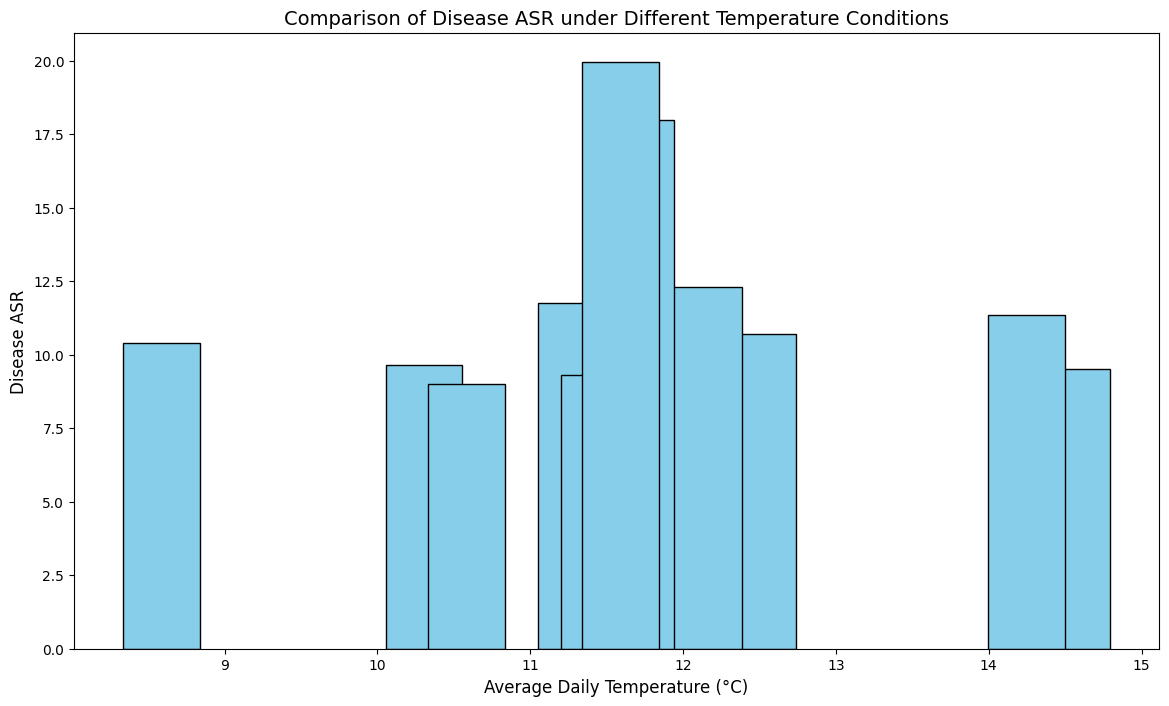

In [3]:
city = None
disease = None

city_textbox = widgets.Text(
    value='',
    description='City:',
    disabled=False
)

disease_textbox = widgets.Text(
    value='COPD',
    description='Disease:',
    disabled=False
)

button = widgets.Button(description="Update Plot")

def on_button_clicked(b):
    global city, disease
    city = city_textbox.value
    disease = disease_textbox.value
    clear_output(wait=True)
    display(city_textbox, disease_textbox, button)
    bom_health(es, start=3, end=14, size=2000, city=city, disease=disease)

button.on_click(on_button_clicked)

display(city_textbox, disease_textbox, button)

In [4]:

    bom_data = bom(es, start=3, end=14, size=2000)
    health_data = health(es, lga=None, size=2000)

    data_health = [item['_source'] for item in health_data]

    health_df = pd.DataFrame(data_health)
    health_df = health_df[health_df['Disease'] == disease]
    
    data_bom = [item['_source'] for item in bom_data]
    bom_df = pd.DataFrame(data_bom)

    # Convert 'local_date_time' in BOM to datetime format
    bom_df['local_date_time'] = pd.to_datetime(bom_df['local_date_time'], format='%Y%m%d%H%M%S')
    bom_df['date'] = bom_df['local_date_time'].dt.date

    # Calculate daily average temperature
    daily_avg_temp = bom_df.groupby('date')['apparent_temperature'].mean().reset_index()
    daily_avg_temp.columns = ['date', 'avg_temperature']
    
    # Determine the minimum length to merge on
    min_length = min(len(daily_avg_temp), len(health_df))
    
    # Truncate both dataframes to the minimum length
    daily_avg_temp = daily_avg_temp.iloc[:min_length]
    health_df = health_df.iloc[:min_length]
    
    # Add date and avg_temperature information to health data
    health_df['date'] = daily_avg_temp['date'].values
    health_df['avg_temperature'] = daily_avg_temp['avg_temperature'].values

In [6]:
import matplotlib.pyplot as plt

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0'),
  Text(0, 22.5, '22.5')])

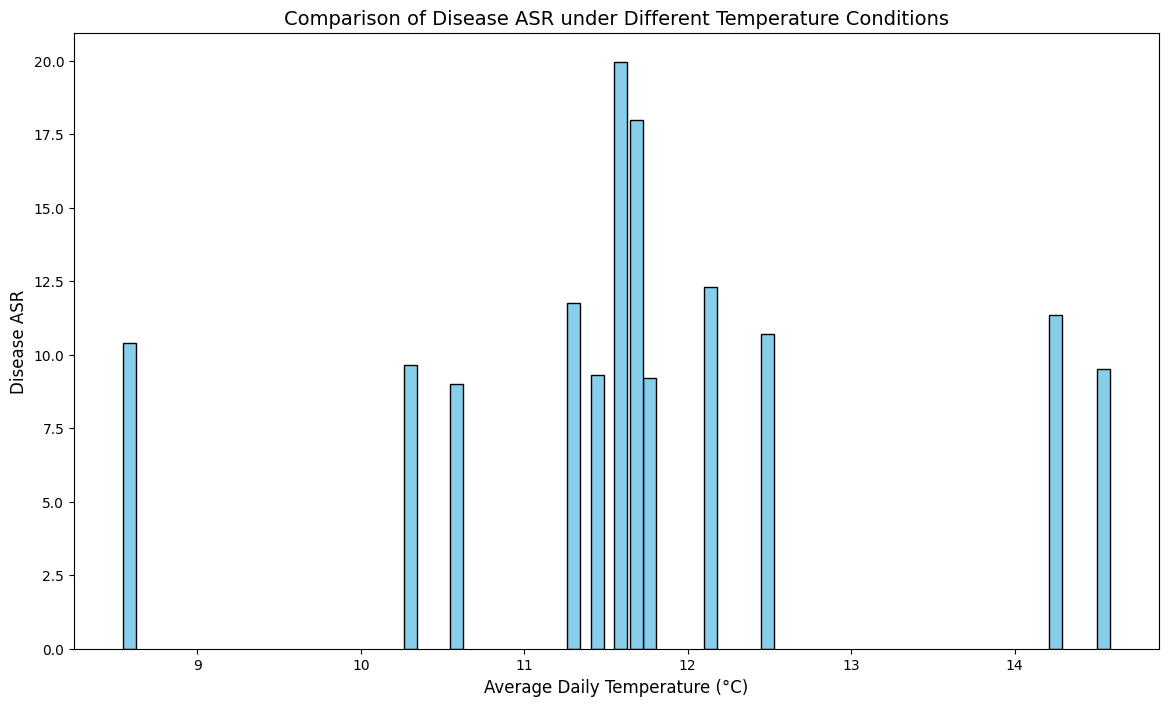

In [11]:
    plt.figure(figsize=(14, 8))
    bars = plt.bar(health_df['avg_temperature'], health_df['ASR'], color='skyblue', edgecolor='black', width=0.08)
    plt.xlabel('Average Daily Temperature (°C)', fontsize=12)
    plt.ylabel('Disease ASR', fontsize=12)
    plt.title('Comparison of Disease ASR under Different Temperature Conditions', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

In [17]:
import requests

In [24]:
res1 = requests.get('http://127.0.0.1:9090/health?size=2000')
# res1.content
res = res1.json()

In [25]:
data_res = [item['_source'] for item in res]
res_df = pd.DataFrame(data_res)
print(res_df)

         ASR                      Disease       LGA    NUM  \
0     22.900        Breast_Cancer_Females  Campaspe   23.0   
1     17.500  Respiratory_System_Diseases  Campaspe   39.0   
2     31.000      Ischaemic_Heart_Disease  Campaspe   67.0   
3     19.367                  Lung_Cancer  Campaspe   43.0   
4      8.148     Cerebrovascular_Diseases  Campaspe   18.0   
...      ...                          ...       ...    ...   
1515  19.866      Ischaemic_Heart_Disease     Yarra   60.0   
1516   9.933            Colorectal_Cancer     Yarra   30.0   
1517   5.304                     Diabetes     Yarra   16.0   
1518  10.800  Respiratory_System_Diseases     Yarra   32.0   
1519  40.466  Circulatory_System_Diseases     Yarra  123.0   

                          PHN     Period     SR  
0                      Murray  2010-2014  140.0  
1                      Murray  2010-2014  119.0  
2                      Murray  2010-2014  129.0  
3                      Murray  2011-2015   92.0  
4    